In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from skimage import io
import os
import seaborn as sns

# Label Preprocessing

In [2]:
picel = pd.read_excel('/Users/atad/Desktop/DIGANES/tables/Picel.xlsx', index_col=0)
illus = pd.read_excel('/Users/atad/Desktop/DIGANES/tables/Illustration.xlsx', index_col=2)

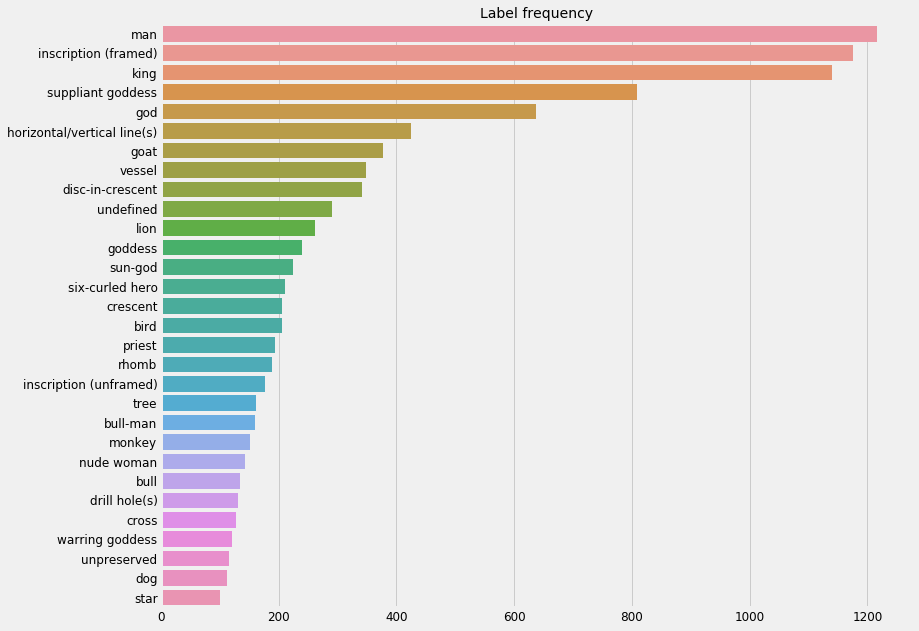

In [6]:
# Get label frequencies in descending order
label_freq = picel.identification.value_counts().sort_values(ascending=False)[0:30]

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.index)
plt.title("Label frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
picel.replace(['undefined', 'unpreserved'], np.NaN, inplace=True)

'''
#take only labels with enough samples
label_counts = picel.identification.value_counts()
labels = label_counts.loc[label_counts.values > 0].index
filtered = picel[picel.identification.isin(labels)]
'''

#create onehot encoding of labels per image
dummy = pd.get_dummies(picel.identification.astype('category'))
onehot = pd.concat([picel[['imageID']], dummy], axis=1, verify_integrity=True)
labels = onehot.groupby(['imageID']).max()

#add img_name column
dataset = illus[illus.index.isin(labels.index)][['Quelle', 'category']].join(labels)
dataset = dataset.rename(columns={"Quelle": "img_name"})
dataset['img_name'] = dataset['img_name'].astype(str) + '.jpg'

#remove samples for which we're missing images
missing_images = []
missing_indices = []
root_dir = '/Users/atad/Desktop/DIGANES/pics'
for index, row in dataset.iterrows():
    filname = os.path.join(root_dir, row["img_name"])
    if os.path.isfile(filname) == False:
        missing_images.append(filname)
        missing_indices.append(index)

dataset = dataset.drop(missing_indices, axis='index')
dataset.to_csv('diganens.csv')